In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
import os

# Add the root of your project to sys.path
project_root = os.path.abspath('..')  # or '.' if your notebook is in root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [8]:
import importlib
import src.eda
importlib.reload(src.eda)

<module 'src.eda' from '/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py'>

In [9]:
input_path = './../data/processed/After_03_Fixing_Outliers.csv'
df = pd.read_csv(input_path)

### Categorical Columns


In [10]:
category_columns = ['CPU_Transistor_Size', 'Sound_3.5mmjack', 'Brand', 'has_GSM', 'has_UMTS', 'has_HSPA', 'has_LTE', 'has_5G', 'has_CDMA', 'has_CDMA2000', 'has_EVDO', 'number_of_sims', 'number_of_2g_bands', 'aws_support', 'number_of_3g_bands', 'is_foldable_phone', 'has_Nano_SIM', 'has_Micro_SIM', 'has_Mini_SIM', 'has_eSIM', 'has_SIM_Type_Specified', 'has_memory_card', 'memory_type_microSDXC', 'memory_type_microSDHC', 'memory_type_microSD', 'memory_type_SD', 'memory_type_Nano_Memory', 'Battery_Is_removable', 'Battery_Type_Lithium', 'Sound_has_stereo_speakers', 'camera_hdr', 'camera_laser_af', 'camera_panorama', 'GPU_company', 'Number_of_cores', 'CPU_Brand', 'Is_OS_Upgradable', 'os_version', 'Resolution_Width', 'Resolution_Height', 'has_8k',	'has_4k',	'has_1440p',	'has_1080p',	'has_720p',	'has_480p',	'has_EIS',	'has_HDR',	'has_stereo',	'has_dolby_vision',	'has_OIS'	,'max_resolution',	'max_FPS',	'ram', 'number_of_camera_features',	'maincamera_mp',	'selfiecamera_mp',	'latest_wifi_version',	'Bluetooth_version',	'has_nfc',	'USB_Type']
for col in category_columns:
    try:
        df[col] = df[col].astype('category')
    except:
        pass

In [11]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

#### Removing Unuseful columns


In [12]:
low_cardinality_features = [column for column in categorical_cols if df[column].nunique() < 5]

In [13]:
unuseful_columns = ['camera_laser_af']

useful_columns = [ column for column in low_cardinality_features if column not in unuseful_columns]

In [14]:
df = df.drop(columns=unuseful_columns)

##### Fixing Number of Cores


In [15]:
from src.eda import group_cores

df['Number_of_cores'] = df['Number_of_cores'].apply(group_cores)

##### Fixing Number of 3G Bands


In [16]:
df['number_of_3g_bands'] = df['number_of_3g_bands'].replace({
    0.0: 1.0,
    7.0: 6.0,
    2.0 : 1.0,
    3.0 : 1.0
})

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_79858/537379771.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['number_of_3g_bands'] = df['number_of_3g_bands'].replace({


##### Fixing Max_Resolution column


<Axes: xlabel='max_resolution', ylabel='Price_In_Dollars'>

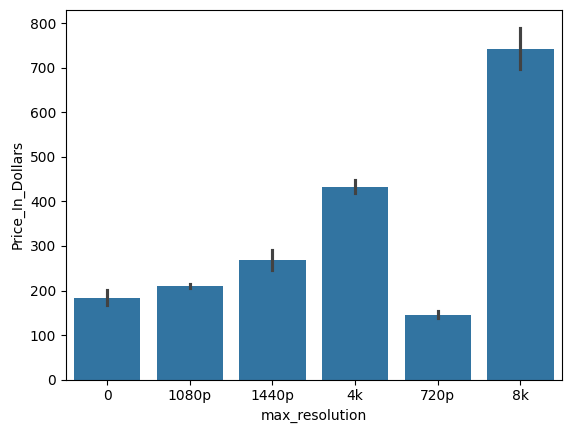

In [17]:
sns.barplot(data = df, x = 'max_resolution', y = 'Price_In_Dollars')

In [18]:
df['max_resolution'] = df['max_resolution'].astype('str')

In [19]:
def fill_max_resolution(row):

    tempdf = df[df['Brand'] == row['Brand']]

    res = tempdf['max_resolution'].mode()[0]
    
    row['max_resolution'] = res

    if res == '720p':
        row['has_720p'] = 1
    elif res == '1080p':
        row['has_1080p'] = 1
    elif res == '4k':
        row['has_4k'] = 1
    elif res == '1440p':
        row['has_1440p'] = 1
    elif res == '8k':
        row['has_8k'] = 1


    if row['max_resolution'] == '0':
        row['max_resolution'] = '720p'
        row['has_720p'] = 1

    return row

In [20]:
df.loc[df['max_resolution'] == '0'] = df[df['max_resolution'] == '0'].apply(fill_max_resolution, axis = 1)

<Axes: xlabel='max_resolution', ylabel='Price_In_Dollars'>

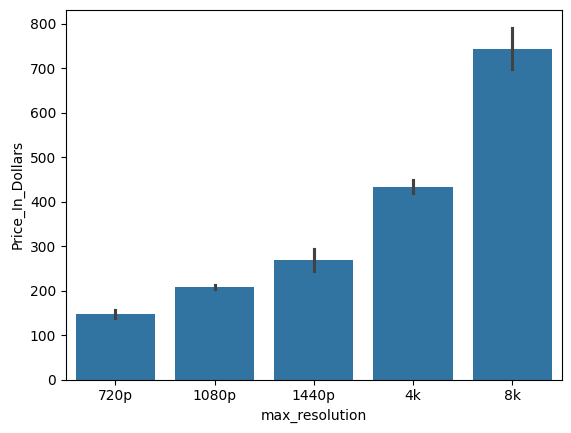

In [21]:
sns.barplot(data = df, x = 'max_resolution', y = 'Price_In_Dollars', order = ['720p', '1080p', '1440p', '4k','8k'])

##### Fixing max_FPS column

    There are so many inconsistencies in the max_FPS column.
    The phone having same FPS is ranging from 100 to 1000 dollars.
    So, i feel like it's not worth it to have this column.


In [22]:
df[df['max_FPS'] == 0][['max_resolution', 'max_FPS', 'Price_In_Dollars']].sample(10)

,max_resolution,max_FPS,Price_In_Dollars
1664,1080p,0,183.6
2941,1080p,0,205.2
2055,1080p,0,205.2
2214,1080p,0,248.4
1032,1080p,0,270.0
1555,4k,0,928.8
756,1440p,0,324.0
1869,1080p,0,118.8
26,1080p,0,54.0
845,1080p,0,64.8


In [23]:
df[df['max_FPS'] != 0][['max_resolution', 'max_FPS', 'Price_In_Dollars']].sample(10)

,max_resolution,max_FPS,Price_In_Dollars
670,1080p,30,140.40
1868,1080p,30,97.20
1270,1080p,30,216.00
3518,1080p,30,194.40
3967,4k,240,129.99
651,1080p,30,270.00
3395,1080p,30,205.20
1741,4k,30,216.00
77,1080p,30,313.20
3660,4k,240,410.40


In [24]:
df[(df['max_FPS'] == 0) & (df['max_resolution'] == '4k')][['max_resolution', 'max_FPS', 'Price_In_Dollars']]

,max_resolution,max_FPS,Price_In_Dollars
311,4k,0,345.60
400,4k,0,367.20
767,4k,0,399.60
1230,4k,0,691.20
1355,4k,0,496.80
1401,4k,0,324.00
1402,4k,0,518.40
1403,4k,0,594.00
1404,4k,0,313.20
1551,4k,0,734.40


In [25]:
tempdf = df[(df['max_FPS'] != 0)]

In [26]:
df[(df['max_FPS'] != 0) & (df['max_resolution'] == '4k')][['max_resolution', 'max_FPS', 'Price_In_Dollars']].sample(30)

,max_resolution,max_FPS,Price_In_Dollars
2287,4k,60,270.00
1560,4k,240,961.20
2784,4k,30,183.60
339,4k,30,410.40
4925,4k,60,229.99
3416,4k,30,432.00
2931,4k,120,378.00
4227,4k,240,499.99
2896,4k,240,410.40
3051,4k,120,399.60


In [27]:
df['max_resolution'].value_counts()

max_resolution
1080p    2640
4k       1679
8k        295
720p      264
1440p     103
Name: count, dtype: int64

In [28]:
df = df.drop(columns = 'max_FPS')

##### Fixing number_of_camera_features


In [29]:
from src.eda import transform_camera_features

df['number_of_camera_features'].apply(transform_camera_features).value_counts()

number_of_camera_features
Medium Features    2474
Less Features      2443
High Features        64
Name: count, dtype: int64

##### Fixing RAM


In [30]:
from src.eda import transform_ram

df['ram'] = df['ram'].apply(transform_ram)

In [31]:
df['ram'].value_counts()

ram
<= 4     2684
6 - 8    1781
8-16      507
16+         9
Name: count, dtype: int64

##### Fixing Bluetooth version


In [32]:
from src.eda import transform_bluetooth_version

df['Bluetooth_version'] = df['Bluetooth_version'].apply(transform_bluetooth_version)

#### High Cardinality Columns


##### Fixing PPI


In [33]:
df[df['PPI'].str.contains('T')][['Resolution_Height', 'Resolution_Width']]

,Resolution_Height,Resolution_Width
58,960.0,540.0
1307,1920.0,1080.0


In [34]:
df.loc[[58, 1307, 2088], 'PPI'] = 400

In [35]:
df['PPI'] = df['PPI'].astype('int')

##### Fixing Selfiecamera_MP


In [36]:
uses_main_cameras = ['ZTE nubia X', 'ZTE nubia Z20', 'Microsoft Surface Duo', 'Asus Zenfone 6 ZS630KL', 'Asus Zenfone 7', 'Asus Zenfone 7 Pro', 'Asus Zenfone 8 Flip', 
'Honor 7i', 'Huawei Mate X', 'Xiaomi Mi Mix Alpha', 'vivo NEX Dual Display', 'Samsung Galaxy A80', 'Oppo N1', 'Oppo N1 mini']

df['selfiecamera_mp'] = df['selfiecamera_mp'].replace(0, np.nan)


df['selfiecamera_mp'] = df['selfiecamera_mp'].astype('float')

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_79858/201384210.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['selfiecamera_mp'] = df['selfiecamera_mp'].replace(0, np.nan)


In [37]:
def fill_mp(row):
    if row['Name'] in uses_main_cameras:
        return row['maincamera_mp']
    return 0

df.loc[df['selfiecamera_mp'].isna(), 'selfiecamera_mp'] = df[df['selfiecamera_mp'].isna()].apply(fill_mp, axis = 1)

df['selfiecamera_mp'] = df['selfiecamera_mp'].astype('category')

In [38]:
def transform_selfie_camera(camera):

    if camera <= 8:
        return 'Low'
    if camera <= 16:
        return 'Medium'
    if camera <= 48:
        return 'High'
    return 'Ultra'


In [39]:
df['selfiecamera_mp'] = df['selfiecamera_mp'].apply(transform_selfie_camera)

##### Fixing MainCamera_MP


In [40]:
df['maincamera_mp'] = df['maincamera_mp'].apply(transform_selfie_camera)

##### Fixing Resolution_Width


In [41]:
def transform_resolution_display(res):
    if res < 1366:
        return 'Low'
    elif res < 1920:
        return 'Medium'
    else:
        return 'High'

In [42]:
df['Resolution_Width'] = df['Resolution_Width'].apply(transform_resolution_display)

##### Fixing Resolution_Height


In [43]:
def transform_resolution_display(res):
    if res < 1080:
        return 'Low'
    elif res < 2160:
        return 'Medium'
    else:
        return 'High'

In [44]:
df['Resolution_Height'] = df['Resolution_Height'].apply(transform_resolution_display)

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = x, y = y, palette='pastel', order = order)


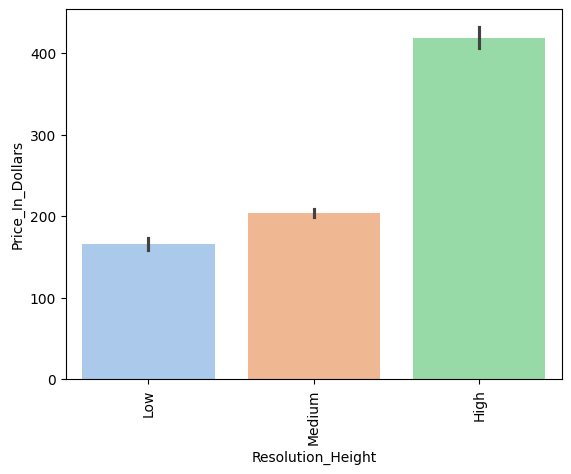

In [45]:
# After transformation
from src.eda import plot_after_transformation

plot_after_transformation(df, 'Resolution_Height', 'Price_In_Dollars', ['Low', 'Medium', 'High'])

##### Fixing os version


In [46]:
df['operating_system'] = df['os_version'].str.split(' ').str[0]

In [47]:
df['operating_system'] = df['operating_system'].apply(lambda x : x if x in ['Android', 'IOS', 'Harmony'] else 'Others')

In [48]:
df = df.drop(columns = 'os_version')

Fixing CPU_Transistor_Size


In [52]:
df['CPU_Transistor_Size'] = df['CPU_Transistor_Size'].astype('float')

In [53]:
df['CPU_Transistor_Size'] = 1/df['CPU_Transistor_Size']
df['CPU_Transistor_Size'] = df['CPU_Transistor_Size'].round()

In [54]:
def transform_CPU_transistor_size(cpu):

    if cpu < 5:
        return 'Less than 5nm'
    
    if cpu < 10:
        return '5nm - 10nm'

    if cpu < 20:
        return '10nm - 20nm'

    return '> 20nm'

In [55]:
df['CPU_Transistor_Size'] = df['CPU_Transistor_Size'].apply(transform_CPU_transistor_size)

In [58]:
df.head()

,Name,Sound_3.5mmjack,Brand,Model,has_LTE,has_5G,has_CDMA,has_CDMA2000,has_EVDO,number_of_sims,...,ram,Total_Pixels,number_of_camera_features,maincamera_mp,selfiecamera_mp,latest_wifi_version,Bluetooth_version,has_nfc,USB_Type,operating_system
0,Meizu PRO 5 mini,Yes,Meizu,PRO 5 mini,1.0,0.0,0.0,0.0,0.0,2.0,...,<= 4,2073600.0,3.0,Medium,Low,2,Less than 4,0.0,Type-B,Android
1,ZTE Blade 11 Prime,Yes,ZTE,Blade 11 Prime,1.0,0.0,0.0,0.0,0.0,2.0,...,<= 4,1152000.0,3.0,Medium,Low,2,5,0.0,Type-C,Android
2,Umidigi One Max,Yes,Umidigi,One Max,1.0,0.0,1.0,0.0,1.0,2.0,...,<= 4,1094400.0,3.0,Medium,Medium,1,Less than 4,1.0,Type-C,Android
3,Coolpad 3632,Yes,Coolpad,3632,1.0,0.0,0.0,0.0,0.0,2.0,...,<= 4,409920.0,2.0,Low,Low,1,Less than 4,0.0,Type-B,Android
4,Coolpad Porto,Yes,Coolpad,Porto,1.0,0.0,0.0,0.0,0.0,1.0,...,<= 4,518400.0,1.0,Low,Low,1,Less than 4,0.0,Type-B,Android


In [59]:
df.to_csv('./../data/processed/After_05_Fixing_Categories.csv', index = False)